<a href="https://colab.research.google.com/github/Vasanth-44/Machine-Learning/blob/main/Student_Score_Predicitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
df = pd.read_csv("Student_performance_data_.csv")


In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
   StudentID  Age  

In [8]:
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


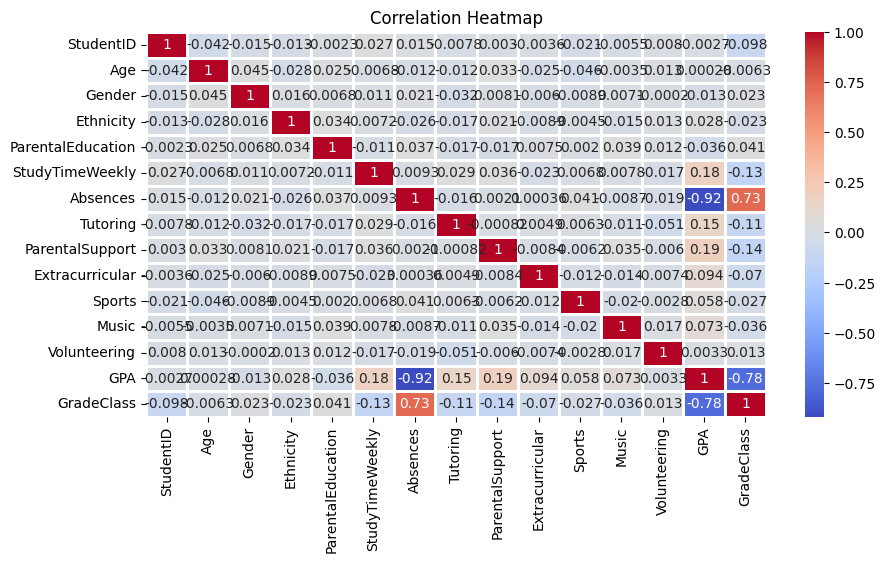

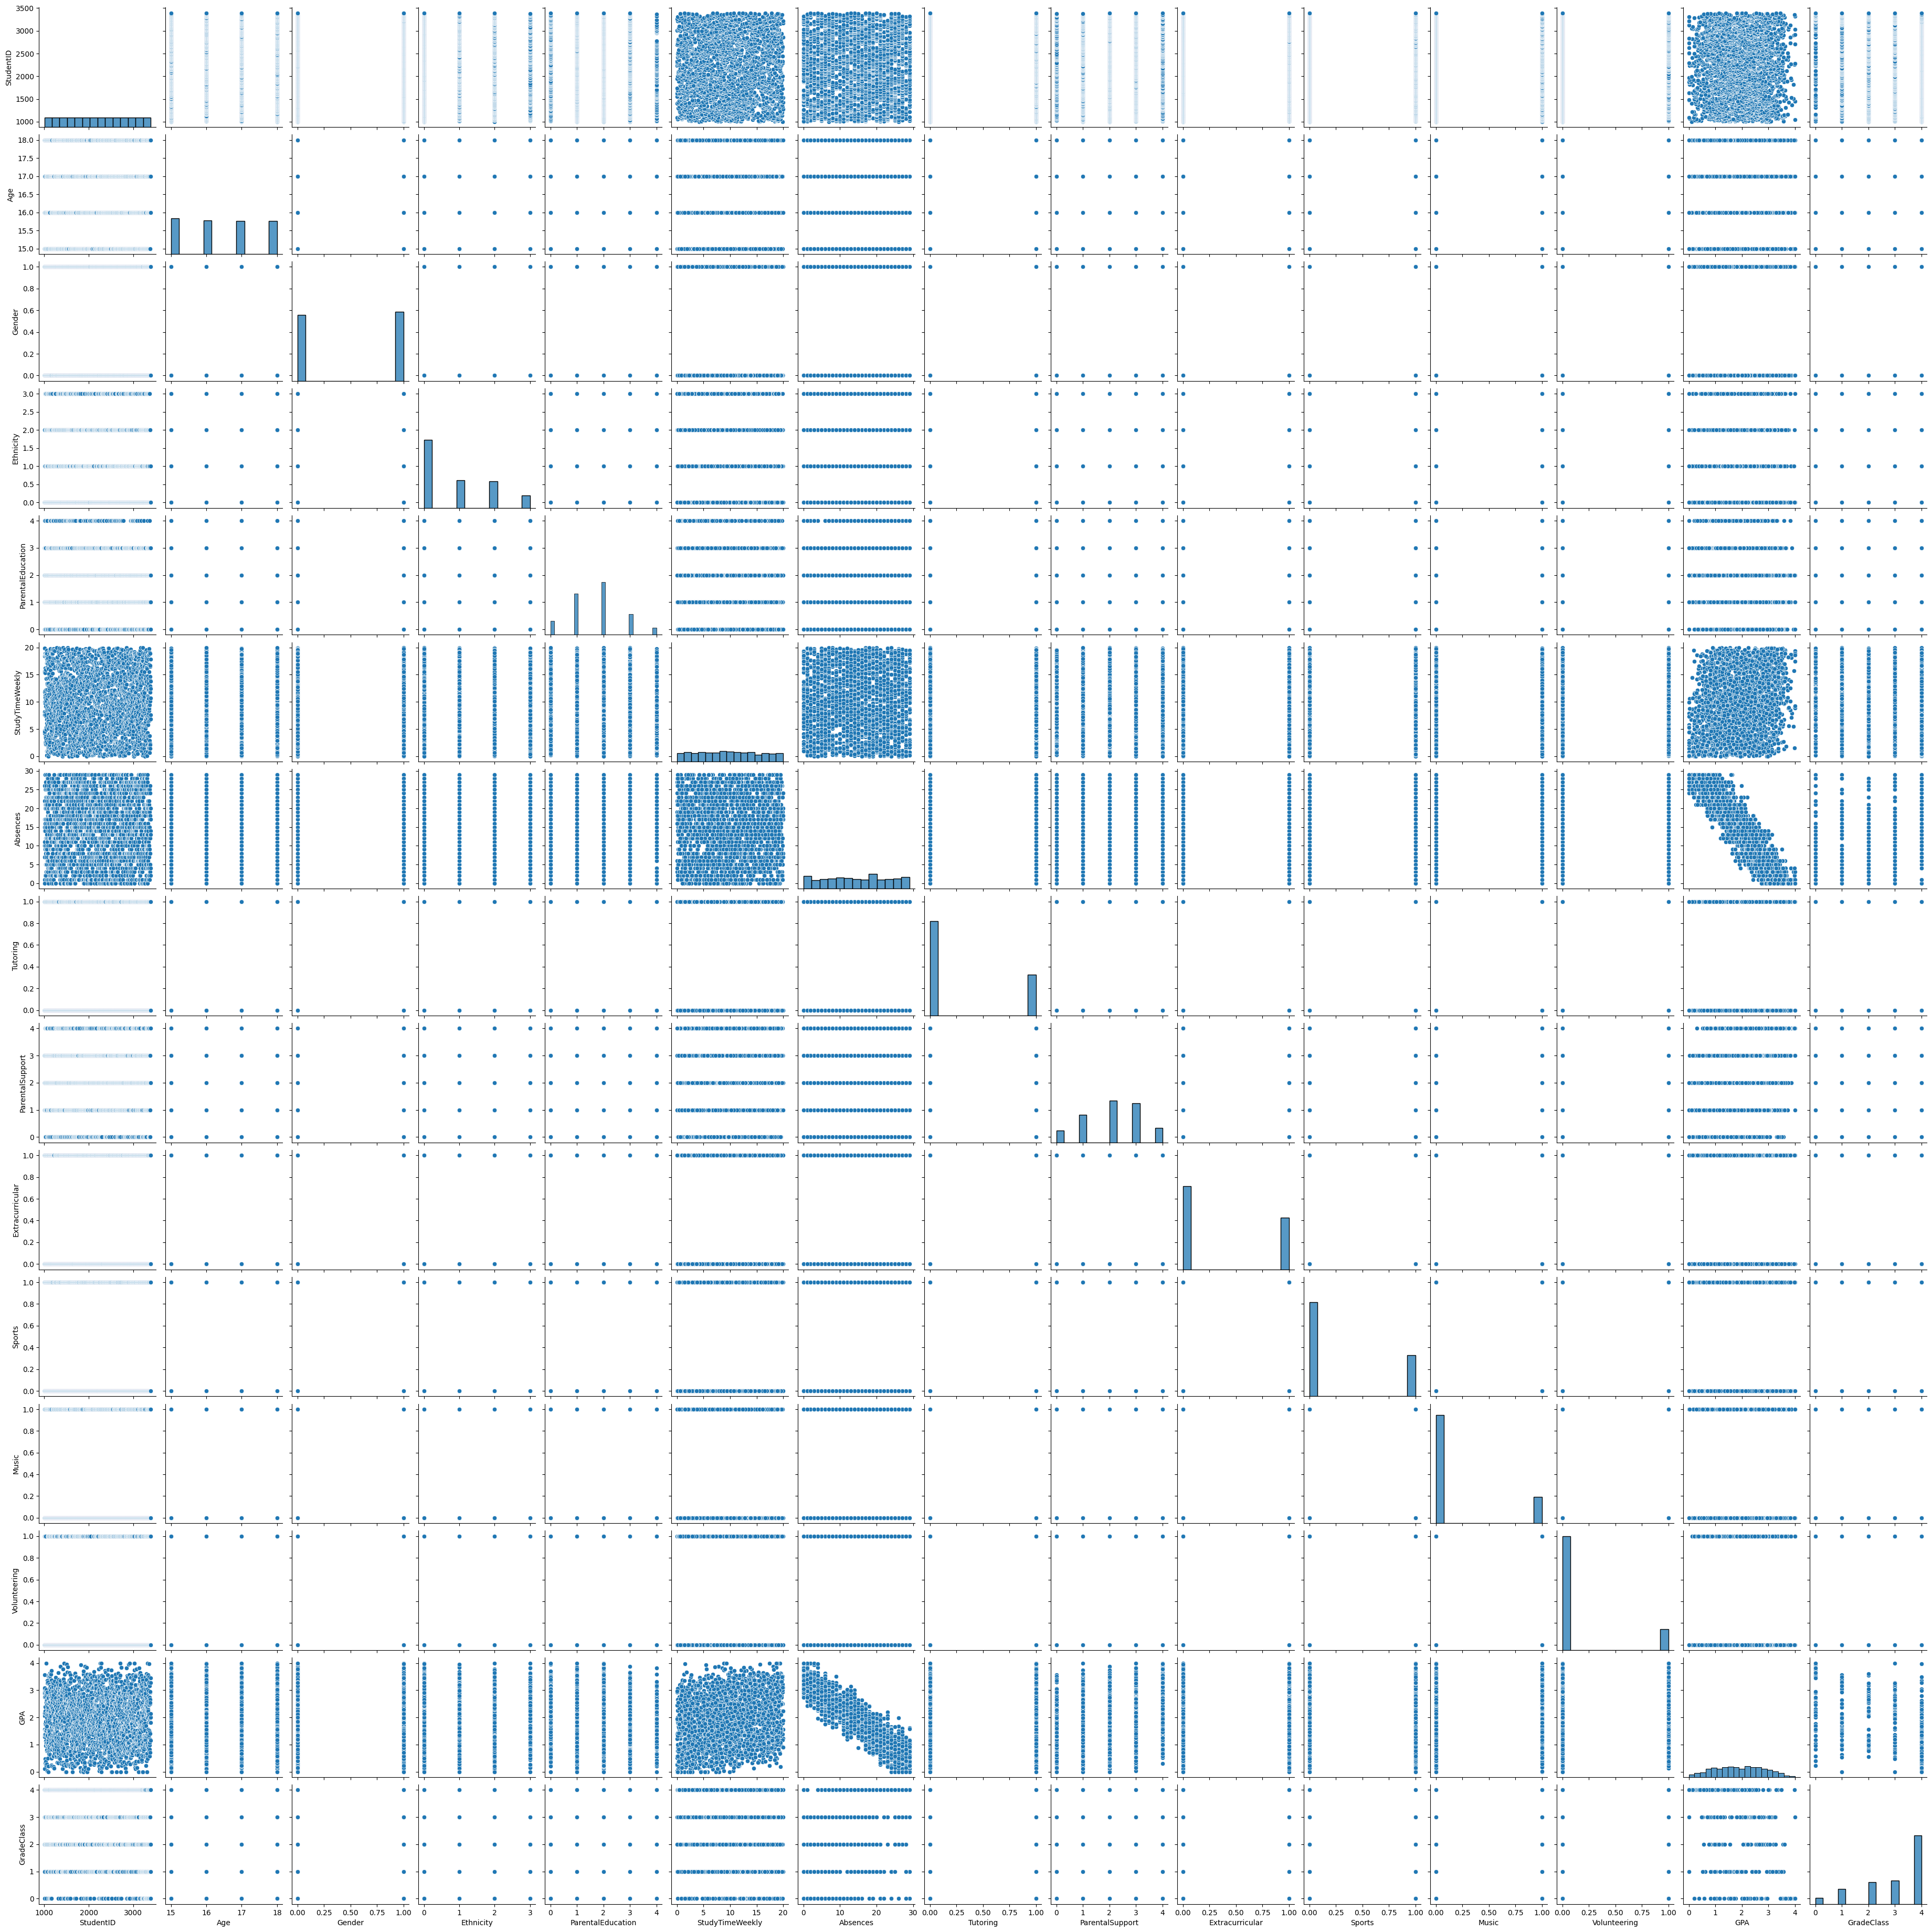

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df)
plt.show()

In [13]:
X = df.drop(columns=['GPA'], errors='ignore')
y = df['GPA']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1913, 14)
Shape of X_test: (479, 14)
Shape of y_train: (1913,)
Shape of y_test: (479,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n🔹 Actual vs Predicted Scores:")
print(comparison.head())


🔹 Actual vs Predicted Scores:
        Actual  Predicted
1004  1.427724   1.455911
196   3.117354   2.967710
2342  2.037769   1.847362
1708  3.548521   3.601779
435   0.248977   0.287601


In [20]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


 Model Performance:
R² Score: 0.957
Mean Squared Error: 0.036


In [21]:
#Predict for Custom Input
print("\n🔹 Example Prediction:")
example_input = X_test.iloc[0:1]
predicted_value = model.predict(example_input)
print("Input:\n", example_input)
print(f"Predicted Score: {predicted_value[0]:.2f}")


🔹 Example Prediction:
Input:
       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1004       2005   15       1          2                  4         0.135763   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
1004        17         0                2                0       1      1   

      Volunteering  GradeClass  
1004             1         4.0  
Predicted Score: 1.46
